## Level 1 : Task 1: Data Cleaning and Preprocessing

In [15]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Reading & Exploring Data
df = pd.read_csv('dirty_cafe_sales.csv')

In [18]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [19]:
df.shape

(10000, 8)

In [20]:
#Checking Column Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [21]:
#Handling Missing Values
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [22]:
df['Item'].fillna('Other', inplace = True)

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_4184\1024328615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna('Other', inplace = True)


In [23]:
df['Item'].replace('UNKNOWN', 'Other', inplace = True)

In [24]:
df['Item'].replace('ERROR', 'Other', inplace = True)

In [25]:
df['Quantity'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_4184\940678420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)


In [26]:
df.dropna(subset=['Quantity'], inplace=True)

In [27]:
df['Price Per Unit'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_4184\529153940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price Per Unit'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)


In [28]:
df.dropna(subset=['Price Per Unit'], inplace=True)

In [108]:
df[['Quantity','Price Per Unit','Total Spent']]

,Quantity,Price Per Unit,Total Spent
0,2,2.0,4.0
1,4,3.0,12.0
2,4,1.0,ERROR
3,2,5.0,10.0
4,2,2.0,4.0
...,...,...,...
9993,2,4.0,NaN
9994,4,4.0,16.0
9995,2,2.0,4.0
9997,4,2.0,8.0


In [29]:
df['Total Spent'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_4184\4032686062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Spent'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)


In [30]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')

In [31]:
df['Total Spent'].fillna(df['Quantity'] * df['Price Per Unit'], inplace=True)


C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_4184\630423867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Spent'].fillna(df['Quantity'] * df['Price Per Unit'], inplace=True)


In [32]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2,4.0,8.0,Cash,NaN,2023-10-20
9994,TXN_7851634,Other,4,4.0,16.0,NaN,NaN,2023-01-08
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02


In [33]:
df['Payment Method'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)
df['Location'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_4184\583141647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)
C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_4184\583141647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [34]:
df['Payment Method'].fillna('Other', inplace = True)
df['Location'].fillna('Other', inplace = True)

In [35]:
df['Transaction Date'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)
df.dropna(subset=['Transaction Date'], inplace=True)

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_4184\1396616084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction Date'].replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)


In [36]:
df.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [37]:
#Checking for Duplicated Values
df.duplicated().sum()

np.int64(0)

In [39]:
# Ensuring Consistent Formats
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8596 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    8596 non-null   object        
 1   Item              8596 non-null   object        
 2   Quantity          8596 non-null   int64         
 3   Price Per Unit    8596 non-null   float64       
 4   Total Spent       8596 non-null   float64       
 5   Payment Method    8596 non-null   object        
 6   Location          8596 non-null   object        
 7   Transaction Date  8596 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 604.4+ KB


In [38]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [40]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,Other,Other,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2,4.0,8.0,Cash,Other,2023-10-20
9994,TXN_7851634,Other,4,4.0,16.0,Other,Other,2023-01-08
9995,TXN_7672686,Coffee,2,2.0,4.0,Other,Other,2023-08-30
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,Other,2023-03-02


## Level 1 : Task 2: Exploratory Data Analysis (EDA)

In [41]:
#Statistical Analysis
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,8596.000000,8596.000000,8596.000000,8596
mean,3.020358,2.951547,8.921650,2023-07-01 20:24:04.020474880
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-01 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.417477,1.276884,5.988538,NaN


In [122]:
df.describe(include = 'object')

,Transaction ID,Item,Payment Method,Location
count,8596,8596,8596,8596
unique,8596,9,4,3
top,TXN_6170729,Juice,Other,Other
freq,1,1020,2704,3407


In [42]:
#Creating Histogram
History = df.groupby(df['Transaction Date'].dt.date)['Total Spent'].sum()

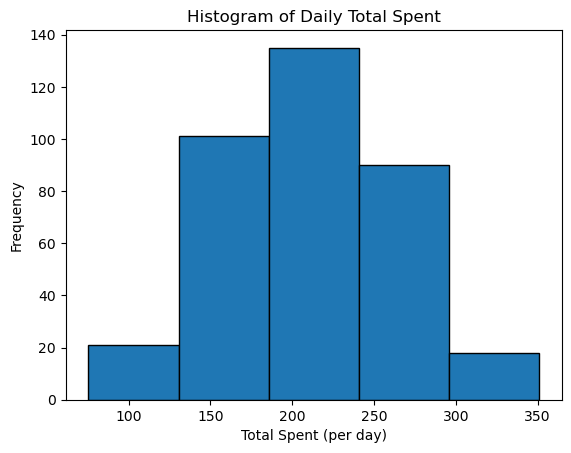

In [43]:
plt.hist(History, bins=5, edgecolor='black')
plt.title('Histogram of Daily Total Spent')
plt.xlabel('Total Spent (per day)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Price Per Unit', ylabel='Total Spent'>

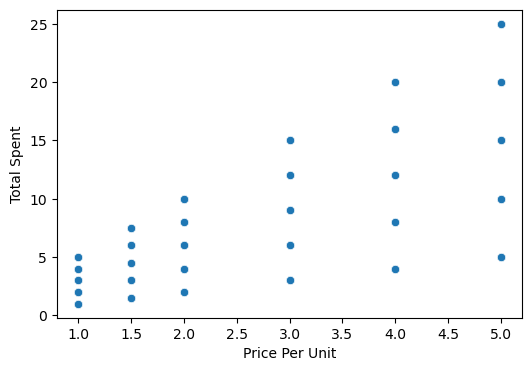

In [44]:
#Checking for Correlation
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price Per Unit', y='Total Spent', data=df)

## Level 1 : Task 3: Basic Data Visualization

In [126]:
#Creating and Exporting Pie Charts
category_counts = df['Payment Method'].value_counts()

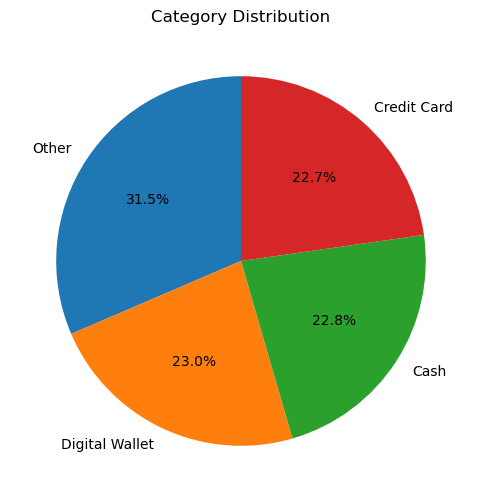

In [130]:
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Category Distribution')
plt.savefig("Payment Types.png", dpi=300, bbox_inches='tight')  
plt.show()

In [132]:
order_counts = df['Item'].value_counts()

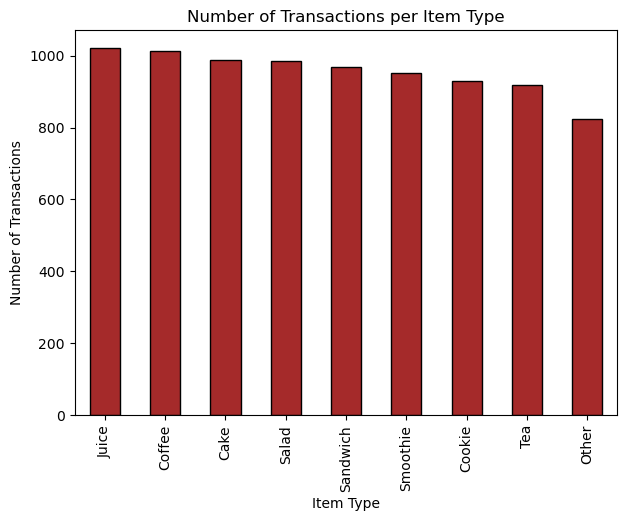

In [135]:
plt.figure(figsize=(7,5))
order_counts.plot(kind='bar', color='brown', edgecolor='black')

plt.title('Number of Transactions per Item Type')
plt.xlabel('Item Type')
plt.ylabel('Number of Transactions')
plt.savefig("Number of Orders.png", dpi=300, bbox_inches='tight') 
plt.show()